### ** Libraries importing ** 


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn import neighbors

### ** Data loading **

In [60]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df= pd.read_csv("/content/drive/MyDrive/ColabNotebooks/stage 2022/dataset_vf.csv")
df1= pd.read_csv("/content/drive/MyDrive/ColabNotebooks/stage 2022/price_fixed_vf.csv")

In [62]:
df

,Product Name,Price_TND,Rating,Review count,Review,Category
0,IBOOLO Handheld 10x Dermatoscope With CE Cer...,"694,606",4.8,4.0,"""good service""",surgical
1,Orthopedic Instruments Surgical Alps Mini 1.6 ...,NaN,5.0,17.0,"""Fast service""",surgical
2,Portable Diathermy Machine High Frequency Ele...,"3157,300",4.9,18.0,"""Good service""",surgical
3,probe reduction forceps surgical basic instrum...,"15,787",5.0,1.0,"""convenient shipping""",surgical
4,Surgical Instruments Hot Sale Surgical Electro...,"0,3158",4.9,10.0,"""Fantastic service""",surgical
...,...,...,...,...,...,...
1240,"High Quality Professional ,farrier tools ,Ha...","23,458",NaN,NaN,NaN,Veterinary
1241,ORTHOPEDIC SET FOR,"283,374",NaN,NaN,NaN,Veterinary
1242,Poultry cow Mastitis Super Paddle test,"1,575",4.6,6.0,"""good service""",Veterinary
1243,your pet care dog ccv test kit/canine rapid te...,"57,935",5.0,1.0,"""good service""",Veterinary


In [63]:
df.describe()

,Rating,Review count
count,814.000000,816.000000
mean,4.755405,16.644608
std,0.408446,21.240514
min,1.300000,0.000000
25%,4.700000,3.000000
50%,4.900000,9.000000
75%,5.000000,19.000000
max,5.000000,166.000000


### ** Data cleaning **

In [64]:
print(df.isnull().sum()) #Number of empty cells for each column

Product Name      0
Price_TND       159
Rating          431
Review count    429
Review          537
Category          0
dtype: int64


In [65]:
df= df.drop(['Review'], axis=1) # Deleting useless columns "Review" and "Product Name"


In [66]:
df.dropna(subset=['Price_TND'],inplace=True) #Deleting empty rows that don't contain value for "Price_TND"


In [67]:
print(df["Price_TND"].isnull().sum()) #count the number of missing values for the column "Price_TND"

0


In [68]:
df.reset_index(drop=True, inplace=True) # re-indexing the dataframe 

In [69]:
#replacing the missing values in the column Rating with the Rating's mean

x = round(df["Rating"].mean(),2) 
df["Rating"].fillna(x, inplace = True)

In [70]:
#replacing the missing values in the column Review count with the Review count's mean

x = round(df["Review count"].mean(),0)
df["Review count"].fillna(x, inplace = True)

In [71]:
df["Product Name"]=df["Product Name"].str.replace("[^a-zA-Z0-9 ]", "",regex=True) #to replace any character that doesn't match to a-z or A-Z or 0 to 9 in product name 

In [72]:
df

,Product Name,Price_TND,Rating,Review count,Category
0,IBOOLO Handheld 10x Dermatoscope With CE Cer...,"694,606",4.80,4.0,surgical
1,Portable Diathermy Machine High Frequency Ele...,"3157,300",4.90,18.0,surgical
2,probe reduction forceps surgical basic instrum...,"15,787",5.00,1.0,surgical
3,Surgical Instruments Hot Sale Surgical Electro...,"0,3158",4.90,10.0,surgical
4,Multipurpose Diagnostic Set Applications Oto...,"126,292",4.70,2.0,surgical
...,...,...,...,...,...
1081,High Quality Professional farrier tools Half...,"23,458",4.76,16.0,Veterinary
1082,ORTHOPEDIC SET FOR,"283,374",4.76,16.0,Veterinary
1083,Poultry cow Mastitis Super Paddle test,"1,575",4.60,6.0,Veterinary
1084,your pet care dog ccv test kitcanine rapid tes...,"57,935",5.00,1.0,Veterinary


In [73]:
 df.dtypes #return data type for each column of the dataframe

Product Name     object
Price_TND        object
Rating          float64
Review count    float64
Category         object
dtype: object

In [74]:
df['Product Name'] = df['Product Name'].astype("string") #change the type of the column "Product Name" to string

In [75]:
#we can see that Price_TND has an object as a type and we can't use to_nummeric to change the type because when testing it will raise the error can't parse string to float

In [76]:
df.drop(['Price_TND'], inplace=True, axis=1) #delete the column "Price_TND" in df 

In [77]:
df1 #visualizing the second dataframe df1 

,Product Name,Price_TND
0,Iboolo Handheld 10X Dermatoscope With Ce Certi...,694.610
1,Portable Diathermy Machine High Frequency Elec...,3157.300
2,Probe Reduction Forceps Surgical Basic Instrum...,15.790
3,Surgical Instruments Hot Sale Surgical Electro...,0.320
4,Multi-Purpose Diagnostic Set Applications Otos...,126.290
...,...,...
1081,"High Quality Professional ,Farrier Tools ,Half...",23.458
1082,Orthopedic Set For,283.374
1083,Poultry Cow Mastitis Super Paddle Test,1.575
1084,Your Pet Care Dog Ccv Test Kit/Canine Rapid Te...,57.935


In [78]:
df1.dtypes   #return data type for each column of the dataframe 


Product Name     object
Price_TND       float64
dtype: object

In [79]:
#we can see that here the type of Price_TND is float64 we can use it for df

In [80]:
df.insert(loc=1, column="Price_TND", value= df1.iloc[:,1:].values ) #add a new column "Price_TND" in df with the values of df1["Price_TND"]

In [81]:
df.dtypes #return data type for each column of the dataframe 
#to make sure of the changes ( Price_TND type)


Product Name     string
Price_TND       float64
Rating          float64
Review count    float64
Category         object
dtype: object

In [82]:
df.drop_duplicates(subset=["Product Name"], keep='first',  inplace=True) # delete duplicate rows

In [83]:
df.reset_index(drop=True, inplace=True) # reindexing the dataframe after deleting rows 

In [84]:
df.shape

(1070, 5)

In [85]:
data = df #creating a copy of df that will be used later 


### ** Encoding categorical data **

In [86]:
df['Category'].unique() # values taken by the column "Category"

array(['surgical', 'analysis', 'Emergency', 'Gynecology Obstetrics',
       'Hospital furniture', 'Nursing', 'Radiology', 'Physical Therapy',
       'Dental ', 'Household Equipement', 'Rehabilitation Equipement',
       'Hearing products', 'Veterinary'], dtype=object)

In [87]:
df = pd.get_dummies(df,drop_first=True, columns=['Category']) #encoding the column "Category"

In [88]:
df.head() # five first rows of the dataframe

,Product Name,Price_TND,Rating,Review count,Category_Emergency,Category_Gynecology Obstetrics,Category_Hearing products,Category_Hospital furniture,Category_Household Equipement,Category_Nursing,Category_Physical Therapy,Category_Radiology,Category_Rehabilitation Equipement,Category_Veterinary,Category_analysis,Category_surgical
0,IBOOLO Handheld 10x Dermatoscope With CE Cer...,694.61,4.8,4.0,0,0,0,0,0,0,0,0,0,0,0,1
1,Portable Diathermy Machine High Frequency Ele...,3157.30,4.9,18.0,0,0,0,0,0,0,0,0,0,0,0,1
2,probe reduction forceps surgical basic instrum...,15.79,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
3,Surgical Instruments Hot Sale Surgical Electro...,0.32,4.9,10.0,0,0,0,0,0,0,0,0,0,0,0,1
4,Multipurpose Diagnostic Set Applications Oto...,126.29,4.7,2.0,0,0,0,0,0,0,0,0,0,0,0,1


### ** Data visualization **

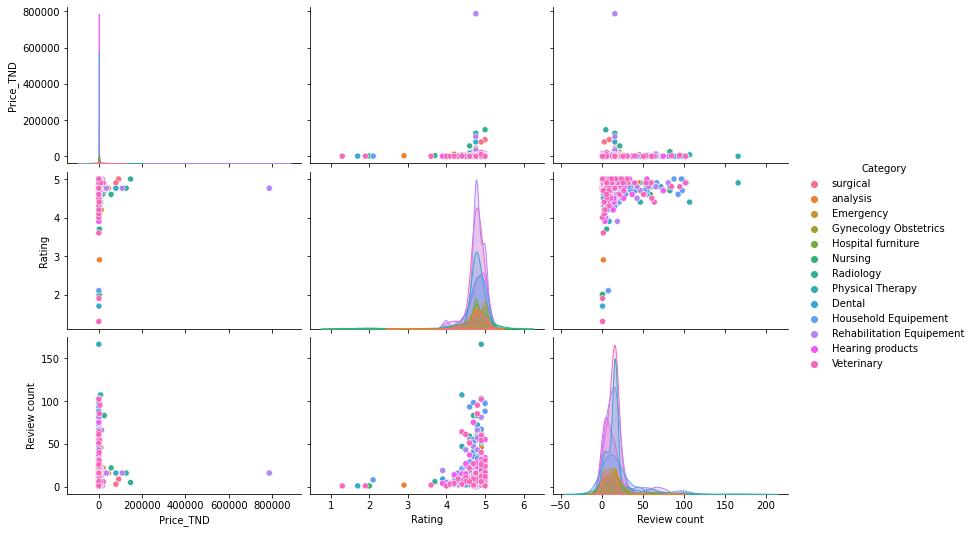

In [89]:
sns.pairplot(data, hue='Category', aspect=1.5) # Plot pairwise relationships in a dataset.
plt.show() #Display all open figures.

In [90]:
data

,Product Name,Price_TND,Rating,Review count,Category
0,IBOOLO Handheld 10x Dermatoscope With CE Cer...,694.610,4.80,4.0,surgical
1,Portable Diathermy Machine High Frequency Ele...,3157.300,4.90,18.0,surgical
2,probe reduction forceps surgical basic instrum...,15.790,5.00,1.0,surgical
3,Surgical Instruments Hot Sale Surgical Electro...,0.320,4.90,10.0,surgical
4,Multipurpose Diagnostic Set Applications Oto...,126.290,4.70,2.0,surgical
...,...,...,...,...,...
1065,High Quality Professional farrier tools Half...,23.458,4.76,16.0,Veterinary
1066,ORTHOPEDIC SET FOR,283.374,4.76,16.0,Veterinary
1067,Poultry cow Mastitis Super Paddle test,1.575,4.60,6.0,Veterinary
1068,your pet care dog ccv test kitcanine rapid tes...,57.935,5.00,1.0,Veterinary


In [91]:
l=[]
for i in data.index :
    
     score = data["Rating"][i]*0.5 + data["Price_TND"][i]*0.2 + data["Review count"][i]*0.3 #calculating a score based on the combination between the Rating, Price_TND and Review count which are the most important features 
     l.append(score)
data.insert(3, "Score",l, True) # adding a new column "Score" in the dataframe "data" filled with the scores calculated above

In [92]:
data

,Product Name,Price_TND,Rating,Score,Review count,Category
0,IBOOLO Handheld 10x Dermatoscope With CE Cer...,694.610,4.80,142.5220,4.0,surgical
1,Portable Diathermy Machine High Frequency Ele...,3157.300,4.90,639.3100,18.0,surgical
2,probe reduction forceps surgical basic instrum...,15.790,5.00,5.9580,1.0,surgical
3,Surgical Instruments Hot Sale Surgical Electro...,0.320,4.90,5.5140,10.0,surgical
4,Multipurpose Diagnostic Set Applications Oto...,126.290,4.70,28.2080,2.0,surgical
...,...,...,...,...,...,...
1065,High Quality Professional farrier tools Half...,23.458,4.76,11.8716,16.0,Veterinary
1066,ORTHOPEDIC SET FOR,283.374,4.76,63.8548,16.0,Veterinary
1067,Poultry cow Mastitis Super Paddle test,1.575,4.60,4.4150,6.0,Veterinary
1068,your pet care dog ccv test kitcanine rapid tes...,57.935,5.00,14.3870,1.0,Veterinary


In [93]:
data3= data #a copy of the dataframe data

### ** Features scaling **

In [94]:
scaler= StandardScaler()
X= data.drop(["Category","Product Name"], axis=1) #delete the column "Category" and return a DataFrame without the removed column
scaler.fit(X) # Compute the mean and standard deviation to be used for later scaling.
X_scaled = scaler.transform(X) #Perform standardization by centering and scaling.

In [95]:
X_scaled

array([[-0.08612278,  0.12229913, -0.08653698, -0.71840752],
       [-0.02840676,  0.42175011, -0.02832296,  0.13024358],
       [-0.10203173,  0.72120108, -0.10253966, -0.90026133],
       ...,
       [-0.10236487, -0.47660281, -0.10272047, -0.59717165],
       [-0.10104401,  0.72120108, -0.10155194, -0.90026133],
       [-0.10159019,  0.00251875, -0.10158487,  0.00900771]])

In [96]:
data= pd.DataFrame(X_scaled,columns=['Rating', 'Price_TND', 'Review count','Score']) #creating a dataframe with the scaled features


In [97]:
data

,Rating,Price_TND,Review count,Score
0,-0.086123,0.122299,-0.086537,-0.718408
1,-0.028407,0.421750,-0.028323,0.130244
2,-0.102032,0.721201,-0.102540,-0.900261
3,-0.102394,0.421750,-0.102592,-0.354700
4,-0.099442,-0.177152,-0.099932,-0.839643
...,...,...,...,...
1065,-0.101852,0.002519,-0.101847,0.009008
1066,-0.095761,0.002519,-0.095755,0.009008
1067,-0.102365,-0.476603,-0.102720,-0.597172
1068,-0.101044,0.721201,-0.101552,-0.900261


### ** Remove outliers**

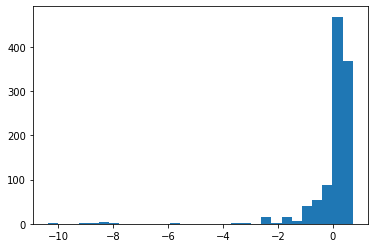

In [98]:
plt.hist(data['Price_TND'],bins=30)
plt.show()

In [99]:
data.describe()

,Rating,Price_TND,Review count,Score
count,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03
mean,3.320293e-17,1.942371e-16,1.660147e-17,-1.992176e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.024010e-01,-1.035848e+01,-1.029299e-01,-9.608793e-01
25%,-1.019714e-01,2.518746e-03,-1.020360e-01,-5.971716e-01
50%,-1.003669e-01,2.518746e-03,-1.001827e-01,9.007712e-03
75%,-8.441520e-02,4.217501e-01,-8.455263e-02,9.007712e-03
max,1.834538e+01,7.212011e-01,1.834538e+01,9.101698e+00


In [100]:
lowerLimit = data['Score'].quantile(0.05) # returns the value at the 5% quantile for the "Score" column
upperLimit = data['Score'].quantile(0.95) # returns the value at the 95% quantile for the "Score" column
data = data[(data['Score']> lowerLimit) & (data["Score"]< upperLimit)] #keep only the values between 5% quantile and 95% quantile for the "Score" column

In [101]:
data

,Rating,Price_TND,Review count,Score
0,-0.086123,0.122299,-0.086537,-0.718408
1,-0.028407,0.421750,-0.028323,0.130244
3,-0.102394,0.421750,-0.102592,-0.354700
4,-0.099442,-0.177152,-0.099932,-0.839643
6,-0.102287,-1.075505,-0.102584,-0.475936
...,...,...,...,...
1064,-0.101959,0.002519,-0.101954,0.009008
1065,-0.101852,0.002519,-0.101847,0.009008
1066,-0.095761,0.002519,-0.095755,0.009008
1067,-0.102365,-0.476603,-0.102720,-0.597172


In [102]:
data4 = data3.drop(columns=["Price_TND","Rating","Review count","Score"]) #new dataframe data4 build after droping the columns "Price_TND","Rating","Review count","Score" of data3 because data3 isn't scaled
data4.info() 
data=  pd.concat([data4, data], axis=1, join="inner") #we will do a join between data4 and data because data is scaled for the data4's dropped columns 
data.reset_index(inplace=True) #reindexing data 
data= data.drop(columns=["index"]) #dropping the extra column "index"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  1070 non-null   string
 1   Category      1070 non-null   object
dtypes: object(1), string(1)
memory usage: 16.8+ KB


In [105]:
result = data.drop(columns=["Product Name","Score"])

In [106]:
result= pd.get_dummies(result, drop_first = True)

In [107]:
result.reset_index(inplace=True)

In [108]:
result.drop(columns=["index"],inplace=True)
result

,Rating,Price_TND,Review count,Category_Emergency,Category_Gynecology Obstetrics,Category_Hearing products,Category_Hospital furniture,Category_Household Equipement,Category_Nursing,Category_Physical Therapy,Category_Radiology,Category_Rehabilitation Equipement,Category_Veterinary,Category_analysis,Category_surgical
0,-0.086123,0.122299,-0.086537,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.028407,0.421750,-0.028323,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.102394,0.421750,-0.102592,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.099442,-0.177152,-0.099932,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.102287,-1.075505,-0.102584,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,-0.101959,0.002519,-0.101954,0,0,0,0,0,0,0,0,0,1,0,0
928,-0.101852,0.002519,-0.101847,0,0,0,0,0,0,0,0,0,1,0,0
929,-0.095761,0.002519,-0.095755,0,0,0,0,0,0,0,0,0,1,0,0
930,-0.102365,-0.476603,-0.102720,0,0,0,0,0,0,0,0,0,1,0,0


### ****KMeans****

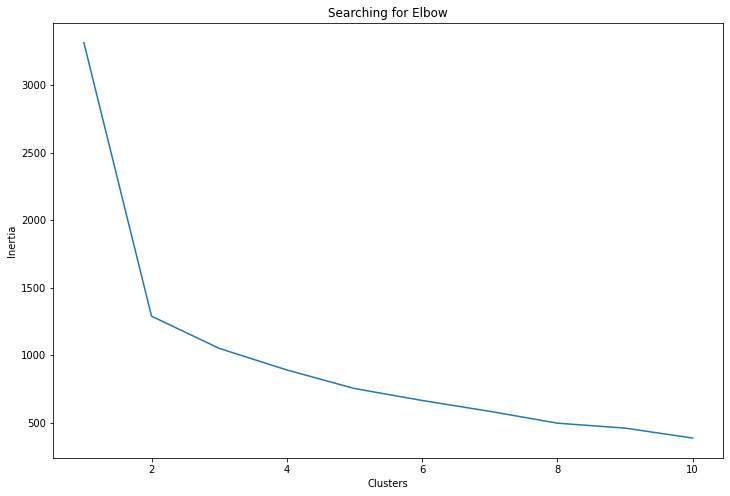

In [109]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(result)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


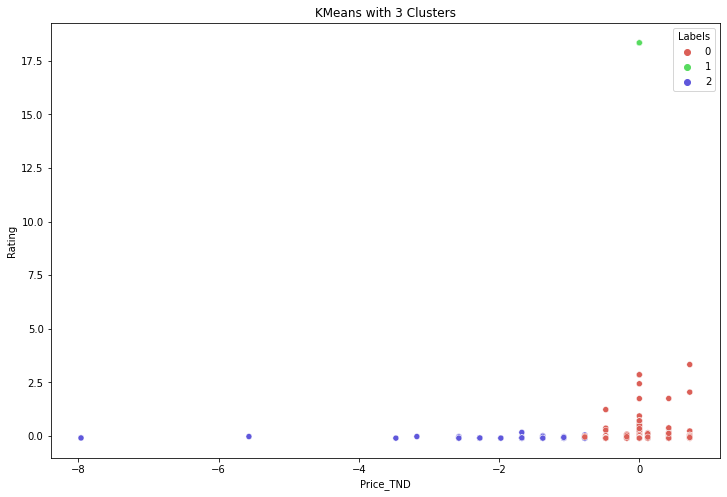

In [110]:
km3 = KMeans(n_clusters=3).fit(result)

result['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(result['Price_TND'], result['Rating'], hue=result['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### ** KNN **

In [111]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree') #building the model
model.fit(result) #fit the model
dist, idlist = model.kneighbors(result) #dist is a list of distances between the k neighbors and idlist is a list of the neighbors index in the dataframe "result"

In [112]:
print(dist, idlist)

[[0.00000000e+00 1.21371493e-01 1.21745413e-01 1.21786840e-01
  1.21821190e-01 1.21859359e-01]
 [0.00000000e+00 4.73391993e-02 1.04833188e-01 3.10468831e-01
  3.14812984e-01 3.17079396e-01]
 [0.00000000e+00 5.74944743e-02 1.04833188e-01 2.99549803e-01
  3.00322159e-01 3.65221998e-01]
 ...
 [0.00000000e+00 1.04356393e-03 2.08712785e-03 4.48729836e-03
  4.90477696e-03 5.42652578e-03]
 [0.00000000e+00 6.26085325e-05 6.00490500e-04 3.15011758e-03
  3.82300856e-03 2.99451025e-01]
 [0.00000000e+00 5.20025344e-05 1.04203931e-04 1.04203931e-04
  1.04203931e-04 1.04203931e-04]] [[  0  17  19  21  22  16]
 [  1   7   2   0   9  11]
 [  2   7   1   9   0  11]
 ...
 [929 861 792 780 848 801]
 [930 772 766 909 769 849]
 [931 862 778 823 750 826]]


In [114]:
#this function represent the recommendation system which will recommend a the top 6 products according to the name searched by the user or the category given 
def Recommender(product_name,category):
    product_list_name = []
    global data
    if (product_name in data["Product Name"].values) :
          product = df[df['Product Name'] == product_name] .index
    
          print(product)
          product = product[0]
          print(idlist[product])
          for newid in idlist[product]:
              product_list_name.append(df.loc[newid]['Product Name'])
    else :
        data = data.sort_values(by=["Score"],ascending=False)
        product_list_name = data.loc[data["Category"]== category]["Product Name"][:6]
    return product_list_name
    
ProductNames = Recommender('aaa', "Emergency") #verifying the function 
ProductNames

74    2022  Manufacture Hot Sale Firstaid  Travel Ab...
64    Huali first aid trauma kit  supplies special s...
83      Huali  manufacture ifak  tactical first aid kit
72    Manufacturing Waterproof Military Tactical Bac...
70           Fast Response Defibrillator AED Rescue Kit
66    Operation Table Manufacturers Hot Selling OR O...
Name: Product Name, dtype: string

In [115]:
data[data["Category"]=="Emergency"].sort_values(by="Score", ascending=False) #this line to make sure about the function results when choosing "Emergency" as a category

,Product Name,Category,Rating,Price_TND,Review count,Score
74,2022 Manufacture Hot Sale Firstaid Travel Ab...,Emergency,-0.102180,-0.177152,-0.101826,0.615187
83,Huali manufacture ifak tactical first aid kit,Emergency,-0.102233,0.721201,-0.102179,0.069626
64,Huali first aid trauma kit supplies special s...,Emergency,-0.102329,0.721201,-0.102274,0.069626
72,Manufacturing Waterproof Military Tactical Bac...,Emergency,-0.102165,0.002519,-0.102160,0.009008
70,Fast Response Defibrillator AED Rescue Kit,Emergency,-0.102217,0.002519,-0.102211,0.009008
66,Operation Table Manufacturers Hot Selling OR O...,Emergency,0.232722,0.002519,0.232727,0.009008
95,first aid kits in the companys family,Emergency,-0.098644,0.002519,-0.098639,0.009008
97,Biphasic Low Energy Aed Defibrillator 150j Uni...,Emergency,-0.043946,0.002519,-0.043940,0.009008
96,CE approval China Defi8 Defibrillator Monitor ...,Emergency,0.089985,0.002519,0.089991,0.009008
94,Outdoor Adventure Equipment Design Outdoor Em...,Emergency,-0.101765,0.002519,-0.101760,0.009008
